X =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y =  [4.275248359838538, 7.744382354876251, 9.87560877686984, 11.207318013023812, 12.634328147181378, 15.82535438900268, 17.070080265369263, 18.68767289267852, 21.151741679814663, 23.5199173459594]


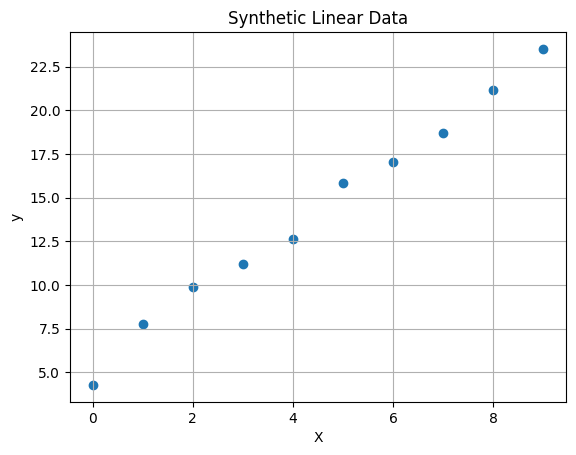

X-Mean :  4.5
Y-Mean :  14.199165222461435


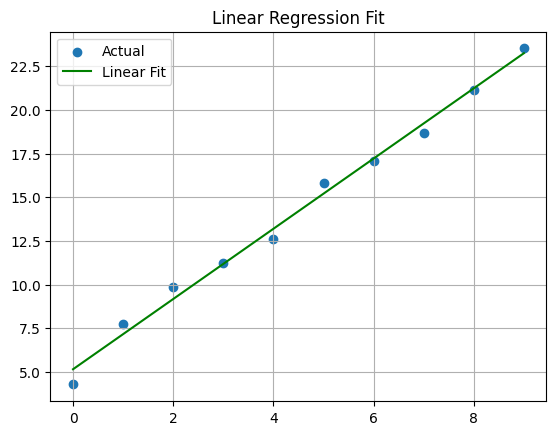

Slope: 2.01, Intercept: 5.15


In [23]:
# LINEAR REGRESSION

import matplotlib.pyplot as plt
import random

X = [i for i in range(10)]
y = [2*x + 5 + random.uniform(-1,1) for x in X]
print("X = ", X)
print("y = ", y)

plt.scatter(X,y)
plt.title("Synthetic Linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

def mean(values):
    return sum(values)/len(values)

def linear_regression(X,y):
    x_mean = mean(X)
    y_mean = mean(y)
    print("X-Mean : ", x_mean)
    print("Y-Mean : ", y_mean)

    numerator = sum( (X[i] - x_mean) * (y[i] - y_mean) for i in range(len(X)) )
    denominator = sum( (X[i] - x_mean)**2 for i in range(len(X)) )
    m = numerator/denominator

    c = y_mean - m*x_mean
    return m, c

m, c = linear_regression(X,y)
y_pred = [m*x + c for x in X]

plt.scatter(X, y, label="Actual")
plt.plot(X, y_pred, color="green", label="Linear Fit")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()


print(f"Slope: {m:.2f}, Intercept: {c:.2f}")


    
    

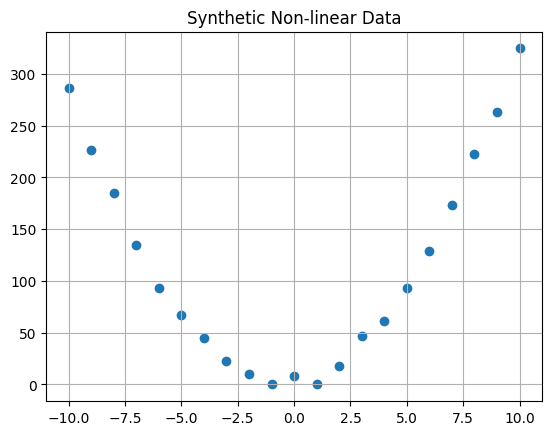

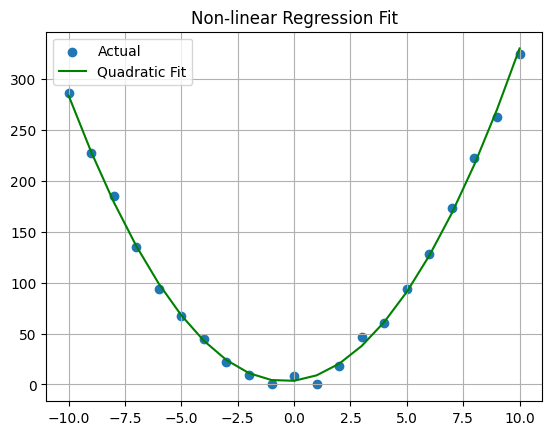

MSE: 21.34


In [21]:
# NON-LINEAR REGRESSION

import random
import matplotlib.pyplot as plt
from numpy.linalg import solve

X = [i for i in range(-10, 11)]
y = [3*x**2 + 2*x + 5 + random.uniform(-10, 10) for x in X]

plt.scatter(X, y)
plt.title("Synthetic Non-linear Data")
plt.grid(True)
plt.show()

def fit_quadratic(X, y):
    n = len(X)
    sum_x = sum(X)
    sum_y = sum(y)
    sum_x2 = sum(x**2 for x in X)
    sum_x3 = sum(x**3 for x in X)
    sum_x4 = sum(x**4 for x in X)
    sum_xy = sum(X[i]*y[i] for i in range(n))
    sum_x2y = sum((X[i]**2)*y[i] for i in range(n))

    A = [
        [n, sum_x, sum_x2],
        [sum_x, sum_x2, sum_x3],
        [sum_x2, sum_x3, sum_x4]
    ]
    
    B = [sum_y, sum_xy, sum_x2y]

    a, b, c = solve(A, B)
    return a, b, c


a, b, c = fit_quadratic(X, y)
y_pred = [a + b*x + c*x**2 for x in X]

plt.scatter(X, y, label="Actual")
plt.plot(X, y_pred, color="green", label="Quadratic Fit")
plt.title("Non-linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()



def mse(y_true, y_pred):
    return sum((y_true[i] - y_pred[i])**2 for i in range(len(y_true))) / len(y_true)

#Use it like this:
error = mse(y, y_pred)
print(f"MSE: {error:.2f}")

